In [1]:
# https://www.kaggle.com/uciml/iris

import numpy as np # linear algebra
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

print('Done')

Done


# Introductory Materials



In [2]:
DATA = pd.read_csv("input/glass.csv")
DATA.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Data quick preparation


In [5]:
# Ids = DATA.Id
# DATA.drop('Id', axis = 'columns', inplace=True)
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB



# Exploring the Data, planning the preprocessing


## Features Overview


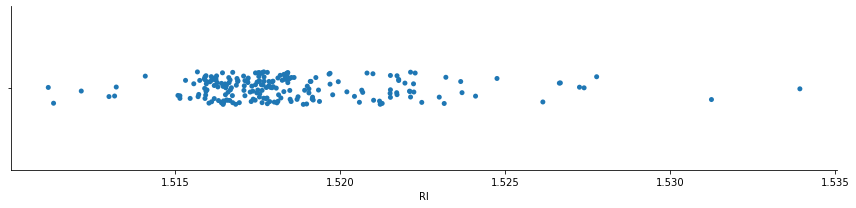

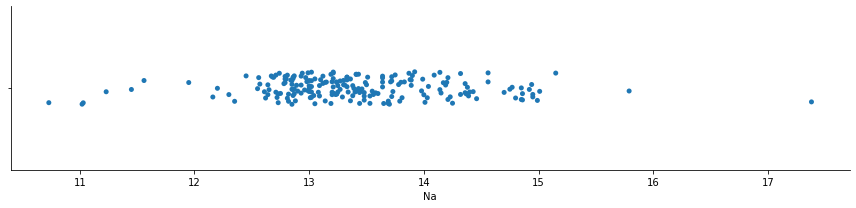

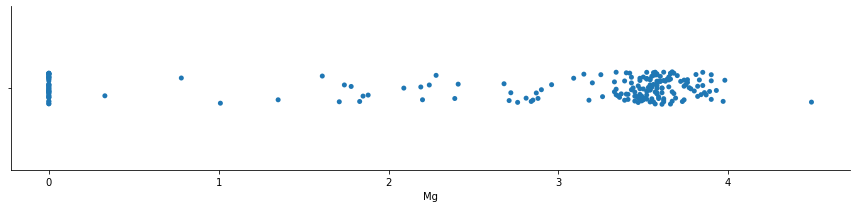

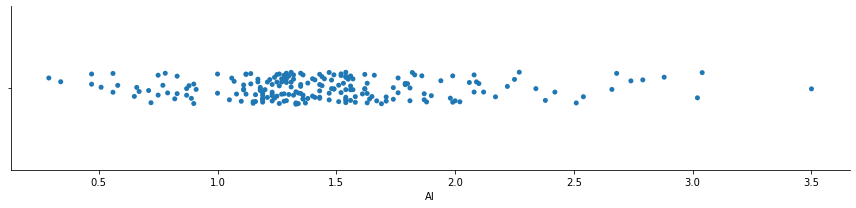

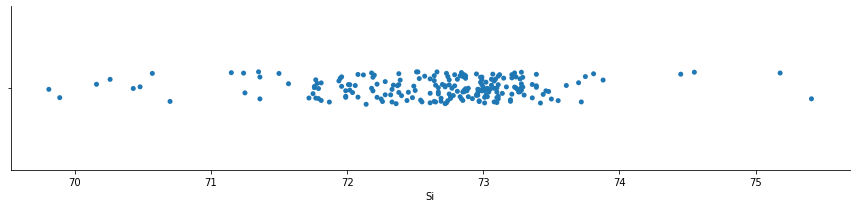

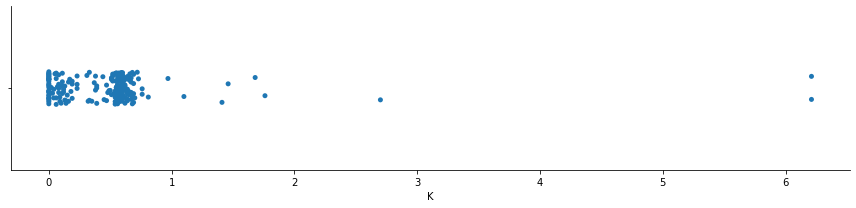

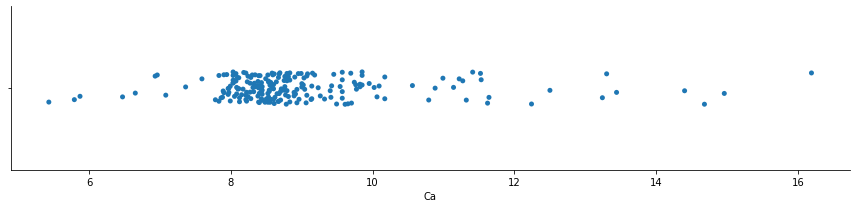

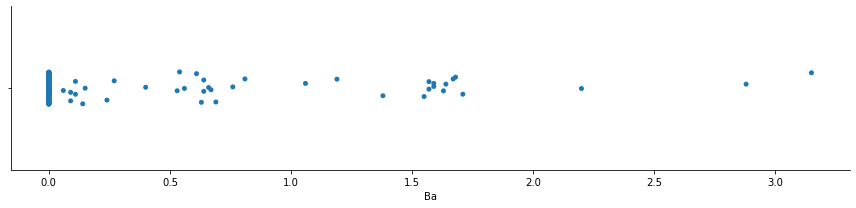

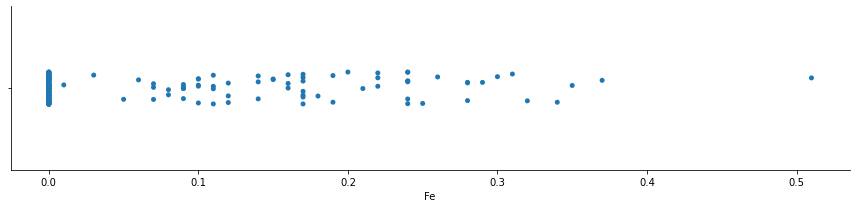

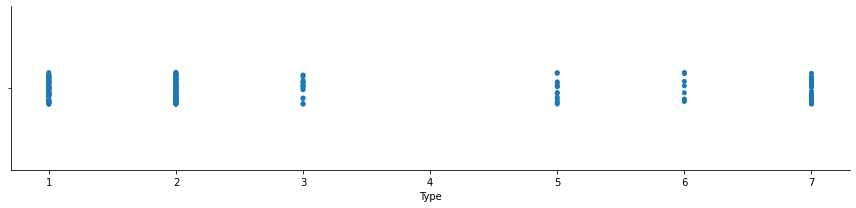

In [6]:
from libs.simpleplotter import simple_features_overview
simple_features_overview(DATA)

# Correlations between data

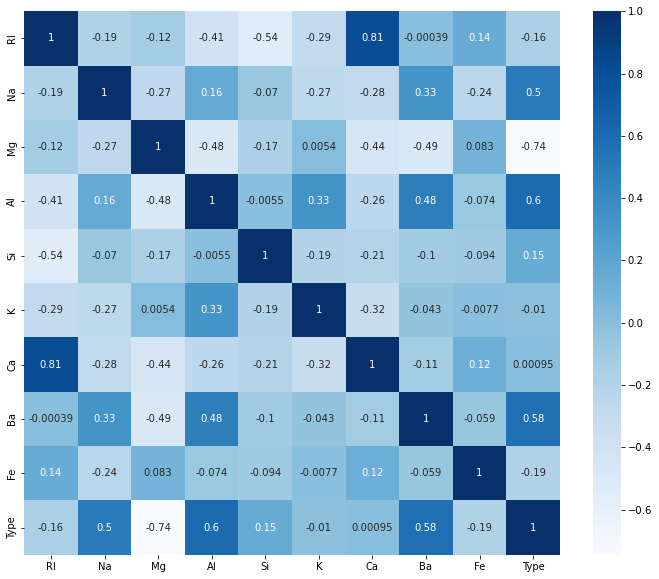

In [7]:
# Heatmap
from libs.simpleplotter import simple_heatmap
simple_heatmap(DATA)

##

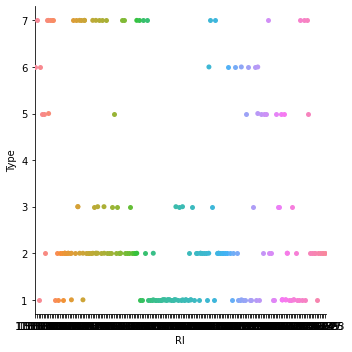

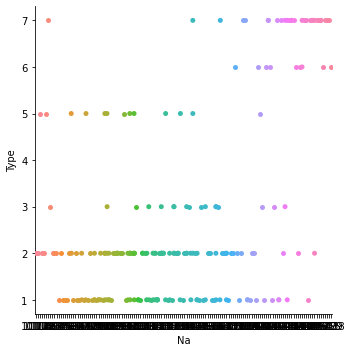

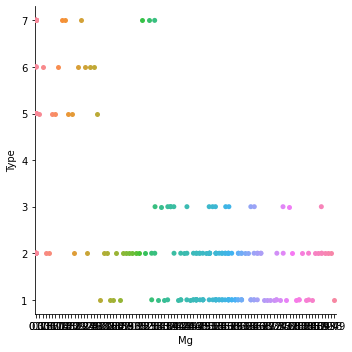

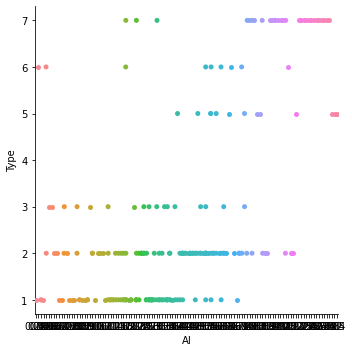

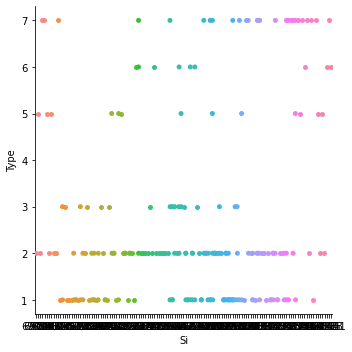

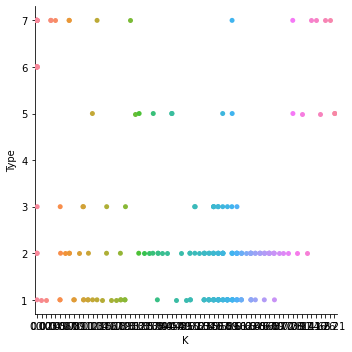

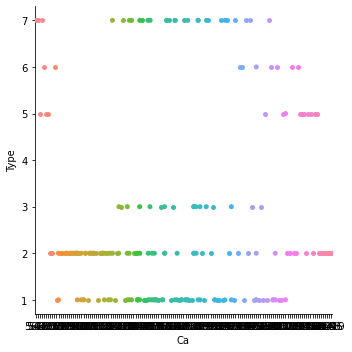

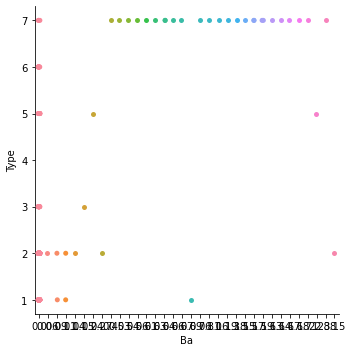

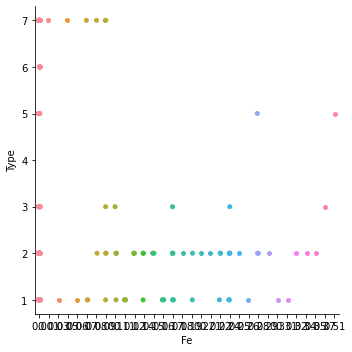

In [8]:
# sns.catplot(x="SepalLengthCm",y="Species",data=DATA)
from libs.simpleplotter import simple_correlations
simple_correlations(DATA, "Type")


## Missing, Categorical & Not Useful Data


In [9]:
DATA.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
DATA.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
DATA.describe(include='object')


# Data Processing


In [11]:
# Let's run the preprocessing on both train and test data

PROCESSED = DATA.copy(deep=True)


PROCESSED["Na"] = PROCESSED["Na"]/10
PROCESSED["Si"] = PROCESSED["Si"]/30
PROCESSED["Mg"] = PROCESSED["Mg"]/4
PROCESSED["Ca"] = PROCESSED["Ca"]/8
PROCESSED["RI"] = PROCESSED["RI"]/1.5

print("Done")
# df['Age'].fillna(df["Age"].mean(), inplace=True)
# fill missing embarked values with the most common one
# df['Embarked'].fillna('S', inplace=True)
# we don't need whole age, as experiments show that age < 18
# is most important for survival
# df["is_child"] = df["Age"]<18

# cols = ['Name', 'Cabin', 'Ticket', 'PassengerId']
# df.drop(cols, axis=1, inplace=True)
# for the need of Receiver Operating Characteristic (ROC) diagram we need to convert strings to ints
# PROCESSED.replace('Iris-setosa', 1, inplace=True)
# PROCESSED.replace('Iris-versicolor', 2, inplace=True)
# PROCESSED.replace('Iris-virginica', 3, inplace=True)

Done


In [12]:
PROCESSED.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.014007,1.364,1.1225,1.10,2.392667,0.06,1.09375,0.0,0.0,1
1,1.011740,1.389,0.9000,1.36,2.424333,0.48,0.97875,0.0,0.0,1
2,1.010787,1.353,0.8875,1.54,2.433000,0.39,0.97250,0.0,0.0,1
3,1.011773,1.321,0.9225,1.29,2.420333,0.57,1.02750,0.0,0.0,1
4,1.011613,1.327,0.9050,1.24,2.436000,0.55,1.00875,0.0,0.0,1



# Post-Processing Data Analysis


In [ ]:
# Heatmap
from libs.simpleplotter import simple_heatmap
simple_heatmap(PROCESSED)

# Preparing for Model Training

## Separating target from features

In [13]:
y = PROCESSED['Type']
X = PROCESSED.drop(['Type'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [14]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview

winner = quick_gridsearchcv_overview(X, y, [5])

> Model: GaussianNB
- F1 score:  0.35631229235880396

> Model: KNeighborsClassifier
- F1 score:  0.5318050033366795

> Model: LinearSVC
- F1 score:  0.49170287077263813

> Model: SVC
- F1 score:  0.5534178999295278

> Model: LogisticRegression


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

- F1 score:  0.43678383213266936

> Model: DecisionTreeClassifier
- F1 score:  0.5788961719194278

> Model: RandomForestClassifier
- F1 score:  0.6196163617504247

> Model: XGBClassifier


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/

[23:17:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
- F1 score:  0.7033121916842847

> Model: GradientBoostingClassifier
- F1 score:  0.5874861572535991

Done.


## Splitting train data into train & validation data
as we can see the number of records in train data is lowered

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 16 to 172
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      171 non-null    float64
 1   Na      171 non-null    float64
 2   Mg      171 non-null    float64
 3   Al      171 non-null    float64
 4   Si      171 non-null    float64
 5   K       171 non-null    float64
 6   Ca      171 non-null    float64
 7   Ba      171 non-null    float64
 8   Fe      171 non-null    float64
dtypes: float64(9)
memory usage: 13.4 KB


In [16]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 197 to 139
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      43 non-null     float64
 1   Na      43 non-null     float64
 2   Mg      43 non-null     float64
 3   Al      43 non-null     float64
 4   Si      43 non-null     float64
 5   K       43 non-null     float64
 6   Ca      43 non-null     float64
 7   Ba      43 non-null     float64
 8   Fe      43 non-null     float64
dtypes: float64(9)
memory usage: 3.4 KB


# Models Training & Hyper-params Tuning for Different Classification Models


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from libs.simple_processing import get_model_name, print_scores

params = [
    # {
    #     'model': KNeighborsClassifier(),
    #     'hyperparams': {
    #         'n_neighbors': range(16, 20, 1),
    #         'n_jobs': range(4, 5, 1)
    #     }
    # },
    # {
    #     'model': DecisionTreeClassifier(random_state=0),
    #     'hyperparams': {
    #         'max_depth': [1, 2, 3, 4, 5],
    #         'max_leaf_nodes': range(2, 7, 1)
    #     }
    # },

    # 0.8011627906976744
    # {'max_depth': 10, 'n_estimators': 90}
    # {
    #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=False),
    #     'hyperparams': {
    #         'n_estimators': range(20, 100, 10),
    #         'max_depth': range(4, 10, 1)
    #     }
    # }
    # 0.8069767441860465
    # {'max_depth': 8, 'n_estimators': 120, 'random_state': 10}
    # {
    #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
    #     'hyperparams': {
    #         'random_state': range(0, 60, 10),
    #         'n_estimators': range(80, 150, 10),
    #         'max_depth': range(7, 15, 1)
    #     }
    # }
    # 0.8012311901504787
    # {'ccp_alpha': 0.0, 'max_depth': 7, 'max_samples': 50, 'n_estimators': 110, 'random_state': 0}
    # {
    #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
    #     'hyperparams': {
    #         'ccp_alpha': np.arange(0, 1, 0.2),
    #         'max_samples': range(10, 80, 10),
    #         'random_state': range(0, 30, 5),
    #         'n_estimators': range(100, 140, 10),
    #         'max_depth': range(7, 10, 1)
    #     }
    # }
    # 0.8012995896032832
    # {'max_depth': 6, 'max_samples': 65, 'n_estimators': 100, 'random_state': 0}
    # {
    #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
    #     'hyperparams': {
    #         'max_samples': range(40, 70, 5),
    #         'random_state': range(0, 30, 5),
    #         'n_estimators': range(100, 130, 10),
    #         'max_depth': range(5, 9, 1)
    #     }
    # }
    # 0.8012995896032832
    # {'max_depth': 6, 'max_samples': 65, 'n_estimators': 60}
    # {
    #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True, random_state=0),
    #     'hyperparams': {
    #         'max_samples': range(50, 80, 5),
    #         'n_estimators': range(40, 80, 10),
    #         'max_depth': range(5, 9, 1)
    #     }
    # }
    # 0.8012995896032832
    # {'max_depth': 6, 'max_features': 'auto', 'max_samples': 65, 'n_estimators': 60}
    # {
    #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, bootstrap=True, oob_score=True, random_state=0),
    #     'hyperparams': {
    #         'max_features':["auto", "sqrt", "log2"],
    #         'max_samples': range(50, 80, 5),
    #         'n_estimators': range(40, 80, 10),
    #         'max_depth': range(4, 8, 1)
    #     }
    # }
    # 0.7370041039671682
    # {'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 11, 'random_state': 5}
    # {
    #     'model': GradientBoostingClassifier(max_features="auto"),
    #     'hyperparams': {
    #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
    #         'random_state': range(0, 30, 5),
    #         'n_estimators': range(5, 15, 1),
    #         'learning_rate': np.arange(0.01, 0.1, 0.01),
    #         'max_depth': range(4, 8, 1)
    #     }
    # }
    # 0.7954856361149111
    # {'learning_rate': 1.0199999999999996, 'max_depth': 5, 'n_estimators': 12, 'random_state': 10}
    # {
    #     'model': GradientBoostingClassifier(max_features="auto"),
    #     'hyperparams': {
    #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
    #         'random_state': range(0, 15, 5),
    #         'n_estimators': range(10, 13, 1),
    #         'learning_rate': np.arange(0.07, 1.2, 0.01),
    #         'max_depth': range(5, 8, 1)
    #     }
    # }
    # 0.8185362517099863
    # {'learning_rate': 1.2, 'max_depth': 6, 'n_estimators': 80, 'random_state': 6}
    # {
    #     'model': GradientBoostingClassifier(max_features="auto"),
    #     'hyperparams': {
    #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
    #         'random_state': range(0, 10, 2),
    #         'n_estimators': range(20, 100, 10),
    #         'learning_rate': np.arange(0.9, 1.5, 0.1),
    #         'max_depth': range(4, 12, 2)
    #     }
    # }
    # 0.8245554035567715
    # {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}
    # {
    #     'model': GradientBoostingClassifier(loss='deviance', max_features="auto"),
    #     'hyperparams': {
    #         'criterion': ['friedman_mse', 'mse', 'mae'],
    #         # 'loss':['deviance', 'exponential'],
    #         'random_state': range(5, 8, 1),
    #         'n_estimators': range(60, 90, 5),
    #         'learning_rate': np.arange(1, 1.4, 0.1),
    #         'max_depth': range(4, 9, 1)
    #     }
    # }
    {
        'model': GradientBoostingClassifier(criterion='mse', loss='deviance', max_features="auto"),
        'hyperparams': {
            # 'criterion': ['friedman_mse', 'mse', 'mae'],
            # 'loss':['deviance', 'exponential'],
            'random_state': range(5, 8, 1),
            'n_estimators': range(65, 85, 2),
            'learning_rate': np.arange(1, 1.4, 0.1),
            'max_depth': range(4, 8, 1)
        }
    }
]

grid_model = {}

for p in params:
    print('> Model:', get_model_name(p['model']))
    grid_model = GridSearchCV(p['model'], p['hyperparams'], cv=2, n_jobs=3, scoring='accuracy', verbose=1)
    grid_model.fit(X_train, y_train)
    y_pred = grid_model.predict(X_valid)
    print(grid_model.best_score_)
    print(grid_model.best_params_)
    print()


print('Done.')

> Model: GradientBoostingClassifier
Fitting 2 folds for each of 480 candidates, totalling 960 fits
0.8245554035567715
{'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}

Done.


## And The Winner Is....


## Score
Accuracy score / Dokładność [(TP+TN) / (TP+TN+FP+FN)]: how many of the values were predicted correctly?
Accuracy count: number of correct predictions
Precision score / Precyzja [TP / (TP+FP)]: how many passengers that the model thought survived actually did survive?
Recall score / Pełność [TP / (TP+FN]: how many of the actual survivors the model correctly predicted?
(also known as true positive rate / wskaźnik skuteczności - ryzyko niepoprawnego oznaczenia ofiary wypadku)
F1 score [2(prec x rec) / (prec + rec)]: combination of the above precision and recall scores

In [ ]:
from libs.simple_processing import print_scores

model = KNeighborsClassifier(n_jobs=4, n_neighbors=19)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_scores(y_valid, y_pred)

In [ ]:
from libs.simpleplotter import decision_tree
model = DecisionTreeClassifier(max_depth=6, random_state=0, max_leaf_nodes=6 )
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print_scores(y_valid, y_pred)
decision_tree(model, X_train)

In [ ]:
model = RandomForestClassifier(criterion='gini', max_depth=7, n_estimators=150, n_jobs=4, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_scores(y_valid, y_pred)

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_scores(y_valid, y_pred)

## Receiver Operating Characteristic (ROC)

In [ ]:
from libs.simpleplotter import simple_roc

simple_roc(y_valid, y_pred)

## Confusion Matrix / Macierz pomyłek

In [ ]:
from libs.simpleplotter import simple_confusion_matrix
conf_matrix = simple_confusion_matrix(y_valid, y_pred, model.classes_)

In [ ]:
print('TP:', conf_matrix[1][1])
print('TN:', conf_matrix[0][0])
print('FP:', conf_matrix[0][1])
print('FN:', conf_matrix[1][0])

## Which features became decision makers for the model?

In [ ]:
from libs.simpleplotter import feature_importance

feature_importance(model, X_train)

# Generating Model Predictions For Test Data & Saving the results for Kaggle Competition

In [ ]:
y_pred = model.predict(X)
output = pd.DataFrame({'Id': Ids, 'Species': y_pred})

print_scores(y, y_pred)
# output.to_csv('./submission.csv', index=False)
# SUBMISSION = pd.read_csv("./submission.csv")
# SUBMISSION